In [1]:
import bff
from pathlib import Path

In [5]:
main_dir = Path('../').resolve()

fn_specs = main_dir / '04-qoi/qoi-specs.yaml'
fn_train = [
    dict(
        inputs = main_dir / '04-qoi/qoi-train-inputs.npy',
        outputs = dict(
            rdf = main_dir / '04-qoi/qoi-train-rdf.npy',
            hb = main_dir / '04-qoi/qoi-train-hb.npy',
            restr = main_dir / '04-qoi/qoi-train-restr.npy'
        ),
        outputs_ref = dict(
            rdf = main_dir / '04-qoi/qoi-ref-rdf.npy',
            hb = main_dir / '04-qoi/qoi-ref-hb.npy',
            restr = main_dir / '04-qoi/qoi-ref-restr.npy'
        ),
        observations = main_dir / '04-qoi/qoi-observations.yaml',
        nuisances = main_dir / '04-qoi/qoi-nuisances.yaml',
        settings = main_dir / '04-qoi/qoi-settings.yaml'
    )
]

fn_hyper = {
    'rdf': './hyper-rdf.yaml',
    'hb': './hyper-hb.yaml',
    'restr': './hyper-restr.yaml',
}

train_data = [bff.structures.TrainData(**t) for t in fn_train]

# Run optimization
learner = bff.BFFLearn(*train_data, specs=fn_specs)
learner.setup_lgp(fn_hyper=fn_hyper)
results = learner.run(max_iter=2000)

# Uncomment if the results are already generated
# fn_chain = './mcmc.h5'
# fn_priors  = './priors.yaml'
# fn_tau = './tau.npy'
# fn_specs = '../04-qoi/qoi-specs.yaml'
# results = bff.structures.InferenceResults(fn_chain, fn_priors, fn_tau, fn_specs)

=== Bayesian Force Field Learning ===
          
Optimizing LGP surrogates          
-------------------------          
> QoI: hb          
  - learning rate search: Done. | lr = 5.0e-03          
  - MAP search: Done.          | loss: 9.349 | grad: 0.010/0.01           
  - Committee: 1 (100%) | MAPE = 1.95%          
> QoI: rdf          
  - learning rate search: Done. | lr = 5.0e-04          
  - MAP search: Done.          | loss: 214.902 | grad: 0.012/0.01          
  - Committee: 1 (100%) | MAPE = 11.46%          
> QoI: restr          
  - learning rate search: Done. | lr = 5.0e-03          
  - MAP search: Done.           loss: 236.776 | grad: 0.013/0.01           
  - Committee: 1 (100%) | MAPE = 20.15%          
          
MCMC posterior sampling          
-----------------------          
  - MCMC did not converge in 2000 iterations.          , fluctuations =  22%          


In [6]:
results.get_chain()

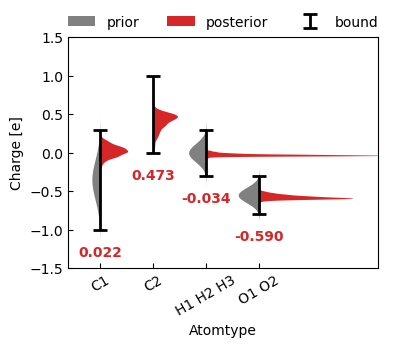

In [7]:
bff.plotting.plot_marginals(results)

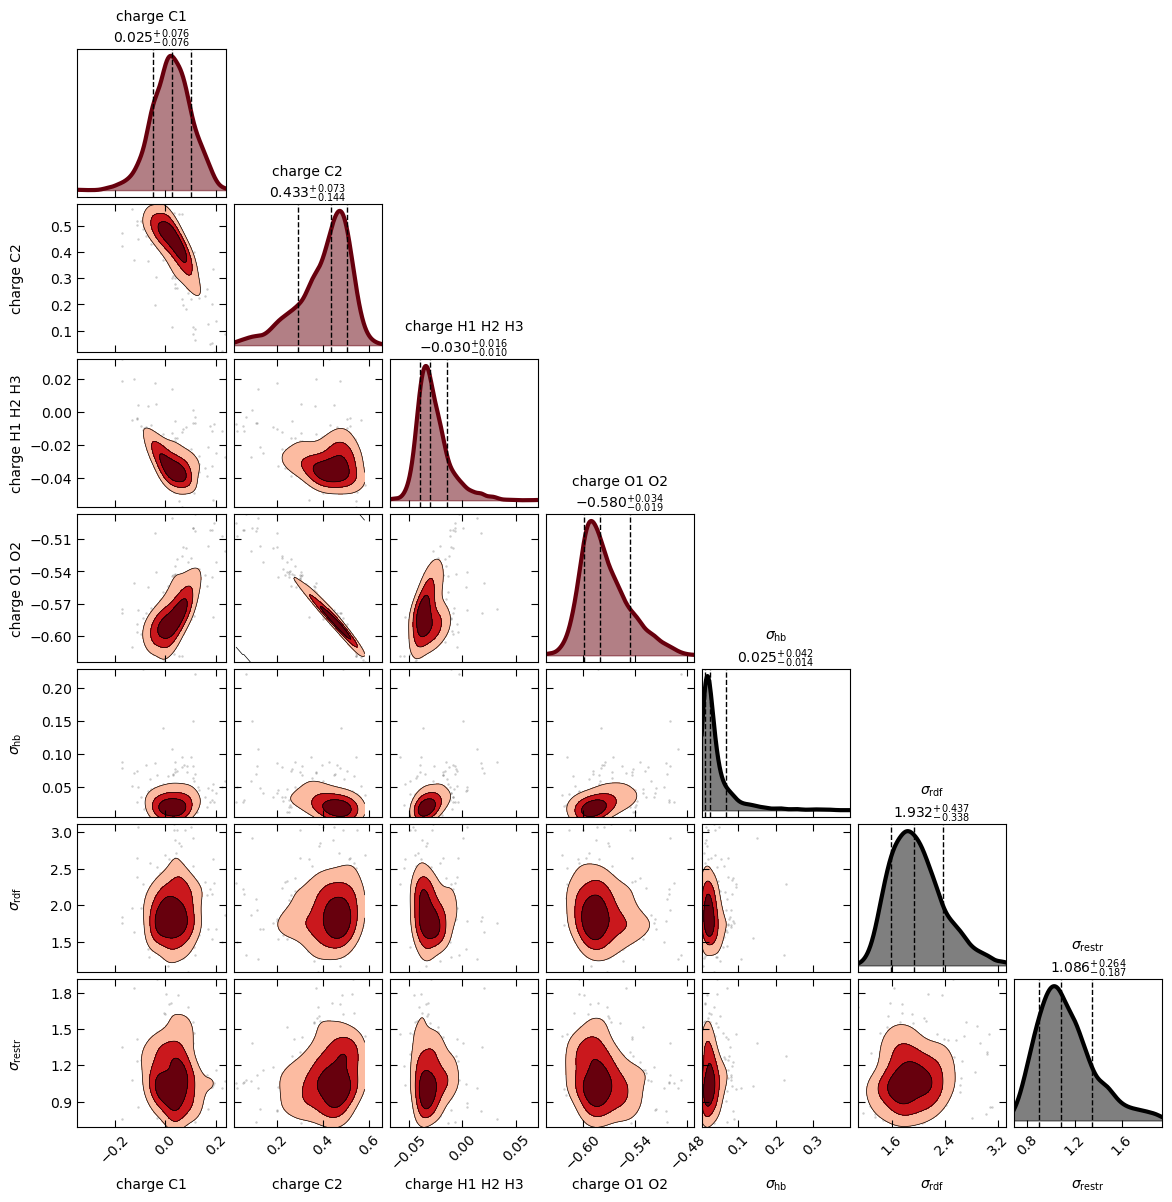

In [8]:
bff.plotting.plot_corner(results.chain_explicit_, results.labels_explicit_)